The following code is from
[Link](https://github.com/justinbois/rdsolver/blob/master/notebooks/asdm_example.ipynb)

> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + c_1 -c_0 u + c_3u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + c_2 -c_3 u^2 v$</center></h3>

With parameters  :
- $D_u = 1, \quad D_v=40$.
- $c_0 = 1$.
- $c_1 = 0.1$.
- $c_2 = 0.9$.
- $c_3 = 1$

In [51]:
%config Completer.use_jedi = False
import numpy as np
import numba
from numba import njit
import scipy.integrate
from matplotlib import pyplot as plt

import rdsolver

In [2]:
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

In [3]:
D

array([0.005, 0.2  ])

In [4]:
beta

array([0.  , 0.02])

In [5]:
gamma

array([[-0.01,  0.  ],
       [ 0.  ,  0.  ]])

In [6]:
#f()
# rho_a, rho_s, kappa_a
f_args

(0.01, 0.02, 0.25)

In [7]:
homo_ss

array([1.  , 1.25])

In [8]:
@numba.jit(nopython=True)
def f(c, t, c_3):
    u = c[0, :, :]
    v = c[1, :, :]    
    u2v = (u ** 2)*v
    fu = c_3*u2v
    fv = -c_3*u2v
    return np.stack((fu, fv))


In [18]:

# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 1600, 16)

const = 1

D[0] = 1.0#1.0#D_u
D[1] = 8.14160033300372#25.61775#30.25754/const#40.0#D_v

beta[0] = 0.0#0.1# c_1
beta[1] = 0.039783394031537536#0.9# c_2

gamma[0,0] = -1.155219930068644e-05#-0.96145#-0.98374/const#-1.0 #c_0
# c_3
f_args = (0.18202869597628227,)


# Initial condition and solve
c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
c_interp = rdsolver.viz.interpolate_concs(c)

100%|██████████| 16/16 [23:21<00:00, 87.57s/it] 


In [13]:
t[-2:]

array([869.75429441, 978.47358121])

In [10]:
# with open('../turing_model_2.npy', 'wb') as f:
#     np.save(f, c)
    
# with open('../turing_t_model_2.npy', 'wb') as f:
#     np.save(f, t)
   

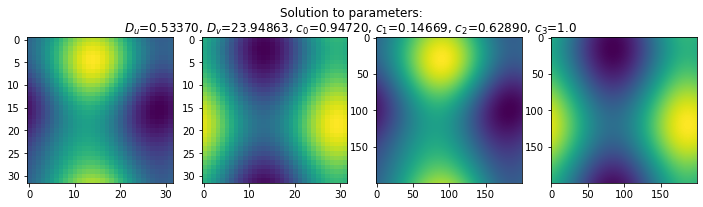

In [19]:
_ = plt.figure(figsize=(12,3))
# Direct solution
plt.suptitle("Solution to parameters:\n" 
             r"$D_u$=0.53370, $D_v$=23.94863, $c_0$=0.94720, $c_1$=0.14669, $c_2$=0.62890, $c_3$=1.0")
plt.subplot(141)
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.imshow(c_interp[1, :,:,-1])
plt.show()

In [23]:
print(np.max(c[0, :,:,0]),np.max(c[0, :,:,-1]))

1.005451144464742 65.27814089393524


In [24]:
print(np.min(c[0, :,:,0]), np.min(c[0, :,:,-1]))

1.0 65.27814089128296


In [25]:
print(np.max(c[0, :,:,0])-np.min(c[0, :,:,0]), np.max(c[0, :,:,-1])-np.min(c[0, :,:,-1]))

0.0054511444647420415 2.6522855023358716e-09


# Estimated Solutions

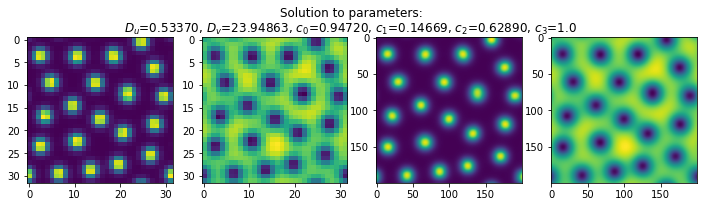

In [21]:
_ = plt.figure(figsize=(12,3))
# Direct solution
plt.suptitle("Solution to parameters:\n" 
             r"$D_u$=0.53370, $D_v$=23.94863, $c_0$=0.94720, $c_1$=0.14669, $c_2$=0.62890, $c_3$=1.0")
plt.subplot(141)
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.imshow(c_interp[1, :,:,-1])
plt.show()

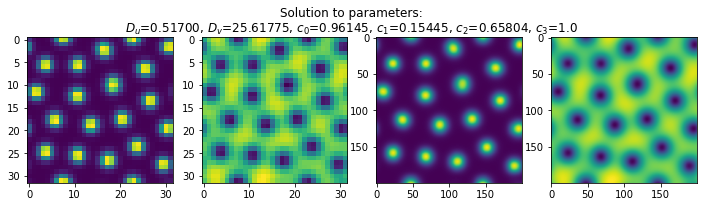

In [19]:
_ = plt.figure(figsize=(12,3))
# Direct solution
plt.suptitle("Solution to parameters:\n" 
             r"$D_u$=0.51700, $D_v$=25.61775, $c_0$=0.96145, $c_1$=0.15445, $c_2$=0.65804, $c_3$=1.0")
plt.subplot(141)
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.imshow(c_interp[1, :,:,-1])
plt.show()

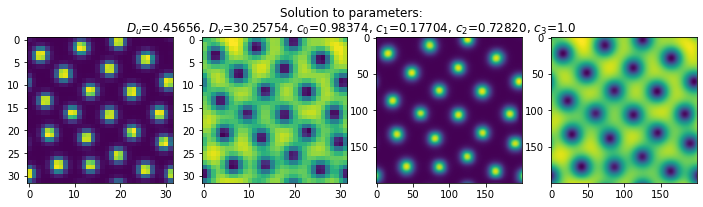

In [16]:
_ = plt.figure(figsize=(12,3))
# Direct solution
plt.suptitle("Solution to parameters:\n" 
             r"$D_u$=0.45656, $D_v$=30.25754, $c_0$=0.98374, $c_1$=0.17704, $c_2$=0.72820, $c_3$=1.0")
plt.subplot(141)
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.imshow(c_interp[1, :,:,-1])
plt.show()

# Original solutions

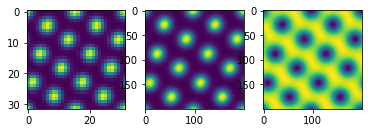

In [9]:
# Direct solution
plt.subplot(131)
plt.imshow(c[0, :,:,-1])
# Interpolated solutions
plt.subplot(132)
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(133)
plt.imshow(c_interp[1, :,:,-1])
plt.show()

### Making an animation

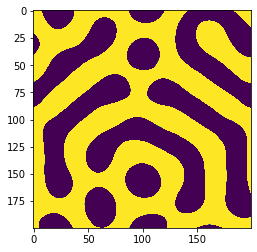

In [10]:
from matplotlib.animation import FuncAnimation

fig = plt.figure()

im = im=plt.imshow(c_interp[0, :,:,0])#  ,interpolation='none')
def init():
    im.set_data(c_interp[0, :,:,0])
    return [im]
    
def animate(i):    
    a=im.get_array()
    a=c_interp[0, :,:,i] 
    im.set_array(c_interp[0, :,:,i] )
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=50, blit=True)


anim.save('turring.gif', writer='imagemagick')

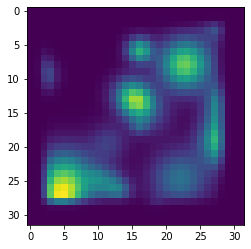

In [28]:
plt.imshow(c[0, :,:,0])
plt.show()

In [ ]:

# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 50000, 256)


D[0] = 1.0#1.0#D_u
D[1] = 8.75967#25.61775#30.25754/const#40.0#D_v

beta[0] = 0.0#0.1# c_1
beta[1] = 0.04374#0.65804#0.72820/const#0.9# c_2

gamma[0,0] = -0.00149#-0.96145#-0.98374/const#-1.0 #c_0
# c_3
f_args = (0.2062,)


# Initial condition and solve
c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
c_interp = rdsolver.viz.interpolate_concs(c)

 32%|███▏      | 81/256 [1:53:53<2:55:28, 60.16s/it]

In [27]:
# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 1000, 8)

const = 1

D[0] = 1.0#1.0#D_u
D[1] = 8.14160033300372#25.61775#30.25754/const#40.0#D_v

beta[0] = 0.1#0.1# c_1
beta[1] = 0.039783394031537536#0.9# c_2

gamma[0,0] = -1.155219930068644e-05#-0.96145#-0.98374/const#-1.0 #c_0
# c_3
f_args = (0.18202869597628227,)


# Initial condition and solve
c02 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c2 = rdsolver.solve(c02, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
c2_interp = rdsolver.viz.interpolate_concs(c2)


  0%|          | 0/8 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [29]:
# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 1000, 8)

const = 1

D[0] = 1.0#1.0#D_u
D[1] = 8.14160033300372#25.61775#30.25754/const#40.0#D_v

beta[0] = 0.1#0.1# c_1
beta[1] = 0.039783394031537536#0.9# c_2

gamma[0,0] = -1.155219930068644e-05#-0.96145#-0.98374/const#-1.0 #c_0
# c_3
f_args = (0.18202869597628227,)


# Initial condition and solve
c02 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c2 = rdsolver.solve(c02, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
c2_interp = rdsolver.viz.interpolate_concs(c2)



  0%|          | 0/8 [00:00<?, ?it/s]

 25%|██▌       | 2/8 [00:14<00:43,  7.33s/it]

 38%|███▊      | 3/8 [01:20<02:39, 31.88s/it]

 50%|█████     | 4/8 [04:03<05:22, 80.72s/it]

 62%|██████▎   | 5/8 [09:40<08:29, 169.74s/it]

 75%|███████▌  | 6/8 [16:58<08:37, 258.84s/it]

 88%|████████▊ | 7/8 [31:47<07:41, 461.41s/it]

100%|██████████| 8/8 [56:12<00:00, 421.57s/it]


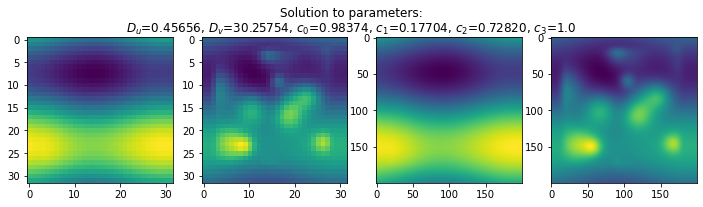

In [30]:
_ = plt.figure(figsize=(12,3))
# Direct solution
plt.suptitle("Solution to parameters:\n" 
             r"$D_u$=0.45656, $D_v$=30.25754, $c_0$=0.98374, $c_1$=0.17704, $c_2$=0.72820, $c_3$=1.0")
plt.subplot(141)
plt.imshow(c2[0, :,:,-1])
plt.subplot(142)
plt.imshow(c2[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.imshow(c2_interp[0, :,:,-1])
plt.subplot(144)
plt.imshow(c2_interp[1, :,:,-1])
plt.show()

In [31]:
print(np.max(c2[0, :,:,0]),np.max(c2[0, :,:,-1]))

1.0133073994906372 141.205794540057


In [32]:
print(np.min(c2[0, :,:,0]),np.min(c2[0, :,:,-1]))

0.9999999999999989 141.20579453801187


In [33]:
print(np.max(c2[0, :,:,0])-np.min(c2[0, :,:,0]), np.max(c2[0, :,:,-1])-np.min(c2[0, :,:,-1]))

0.013307399490638305 2.045140945483581e-09


In [218]:
def get_f(c_0, c_1, c_3):
    @njit
    def f(u,v):
        return c_1 - c_0*u + c_3*u*u*v
    return f

def get_g(c_2, c_3):
    @njit
    def g(u,v):
        return c_2 - c_3*u*u*v
    return g

def get_df(c_0, c_3):
    @njit
    def df(u,v):
        df_1 = np.array(- c_0 + 2*c_3*u*v)
        df_2 = np.array(c_3*u*u)
        return np.stack((df_1, df_2))
    return df

def get_dg(c_3):
    @njit
    def dg(u,v):
        dg_1 = np.array(-2*c_3*u*v)
        dg_2 = np.array(c_3*u*u)
        return np.stack((dg_1, dg_2)) 
    return dg

def get_all(c_0, c_1, c_2, c_3):
    f = get_f(c_0, c_1, c_3)
    g = get_g(c_2, c_3)
    df = get_df(c_0, c_3)
    dg = get_dg(c_3)
    @njit
    def F(args):
        u,v = args
        return np.stack((np.array(f(u,v)),
                         np.array(g(u,v))))
    @njit
    def J(args):        
        u,v = args
        d_f = df(u,v)
        d_g = dg(u,v)
        return np.stack((d_f, d_g))
    @njit
    def J_inv(args):
        u,v = args
        a, b = df(u,v)
        c, d = dg(u,v)
        return np.array([[d , -b],[-c, a]])/(a*d-b*c)
        
    
    return (F, J, J_inv)

def k_c(D_u, D_v, u_star, v_star):
    f_u, f_v , g_u,  g_v = J((u_star, v_star)).flatten()
    return np.sqrt((f_u*g_v - f_v*g_u)/D_u*D_v)

In [219]:
F,J, J_inv = get_all(c_0 = 1, c_1=.1, c_2 = .9, c_3 = 1.0)

In [221]:
@njit
def newton(F, J_inv, iters=1000, tol=1e-20, dim=2 , x_0=None):
    
    if x_0 is None:
        x_0 = np.ones(dim)
        
    x = x_0 - J_inv(x_0) @ F(x_0)
    for i in range(1, iters):
        temp = x
        x = x - J_inv(x) @ F(x)
        if np.sum(np.abs(x - temp)) < tol:
            return x
        
    return x
    

In [49]:
F(1,2).shape

(2,)

In [201]:
x_0  = np.ones(2)
x_0 - J_inv(x_0) @ F(x_0)

array([0.93333333, 0.96666667])

In [202]:
J_inv((1,1))

array([[ 0.33333333, -0.33333333],
       [ 0.66666667,  0.33333333]])

In [222]:
u_star, v_star = newton(F, J_inv, iters=100000, x_0= np.array([3., 1.]))
print(u_star, v_star)

0.9999999999999999 0.9000000000000001


In [223]:
F((u_star, v_star))

array([0.00000000e+00, 1.11022302e-16])

In [224]:
J((u_star, v_star))

array([[ 0.8,  1. ],
       [-1.8,  1. ]])

In [225]:
J((u_star, v_star)).flatten()

array([ 0.8,  1. , -1.8,  1. ])

In [235]:
k_c(1,0.1,u_star, v_star)

0.5099019513592784

In [333]:
F,J, J_inv = get_all(c_0=1.155219930068644e-01, c_1=1.0, c_2=0.039783394031537536,c_3=0.18202869597628227)

In [334]:
u_star, v_star = newton(F, J_inv, iters=100000, x_0= np.array([1., 1.]))
print(u_star, v_star)

nan nan


In [220]:
x_2 = L[0]*np.linspace(0,1,n[0])
y_2 = L[1]*np.linspace(0,1,n[1])

X_2,Y_2 = np.meshgrid(x_2, y_2, sparse=False, indexing='ij')

In [288]:
u = np.zeros_like(X_2)
v = np.zeros_like(X_2)
for i, x in enumerate(x_2):
    for j, y in enumerate(y_2):
        u[i,j], v[i,j] = F((x,y))
        

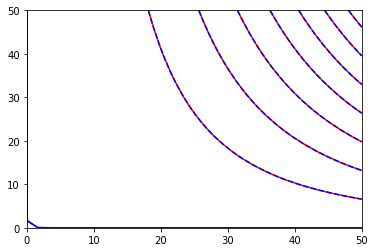

In [289]:
#plt.imshow(u)
#plt.colorbar()


plt.contour(X_2,Y_2, u, colors='red')
plt.contour(X_2,Y_2, v, colors='blue')
#plt.colorbar()
plt.show()

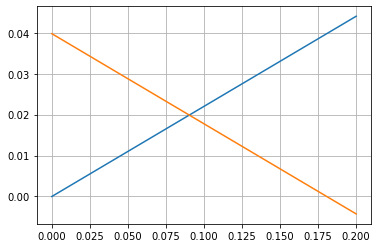

In [329]:
y = np.linspace(0, .2, 200)
plt.plot(y, [F((1.1,j)) for j in y])
plt.grid()

In [322]:
F((1.,.1093))

array([0.01988418, 0.01988766])